In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import seaborn as sns
import numpy as np
import json
import pandas as pd
import os
import traceback

In [5]:
# Graph style design
params = {
        'figure.figsize': (30, 60),
        'figure.titlesize': 30,
        'figure.constrained_layout.use': False,
        'axes.labelsize': 30,
        'axes.titlesize': 30,
        'ytick.labelsize': 25,
        'xtick.labelsize': 25,
        'lines.linewidth': 2.0,
        'lines.marker': '.',
        'lines.markersize': 10,
        'scatter.marker': '.',
        'legend.loc': 'best',
        'legend.fontsize': 25,
        'legend.edgecolor': 'black',
        'legend.frameon': True
    }

In [6]:
DDS_COLOR = 'red'
MQTT_COLOR =  'blue'
ZMQ_COLOR = 'green'

COLORS = ['#000000', '#0000FF', '#00FF00', '#40E0D0', '#4B0082', '#800000', '#ADFF2F', '#C71585', '#696969', '#FFD700']
LINESTYLIES = ["solid", "dashed", "dotted", "dashdot"]

# Throughput Test

1-1 DDS [5.8, 11.540000000000001, 22.34, 40.66, 76.0, 85.28, 91.91999999999999, 94.11999999999999, 93.28, 94.2]
Dimensions of labels and X must be compatible
1-1 ZMQ [12.212694336, 21.196800746, 36.213977666, 48.307656132, 40.642426142, 77.824060328, 76.48972521200001, 92.83853287, 66.995839914, 74.75478553600001]
Dimensions of labels and X must be compatible
1-1 MQTT [0.3853520504, 0.746056863, 1.5713816301999999, 2.6609397314, 4.8689497268, 9.998105836599999, 17.219505108, 29.336690570000002, 44.494329726000004, 60.134451704]
1-n DDS [0.9, 1.8800000000000001, 3.8, 7.359999999999999, 11.98, 12.5, 13.24, 13.48, 13.459999999999999, 13.6]
Dimensions of labels and X must be compatible
1-n ZMQ [11.846847766, 13.8776549048, 14.872013106, 13.704780692, 16.899369147999998, 15.851722906000001, 13.450262052, 14.87485064, 15.181302596, 14.926270992000003]
Dimensions of labels and X must be compatible
1-n MQTT [0.372552503, 0.7681198912, 1.2456025126, 2.4617231328, 4.8737966178, 7.825747828199999

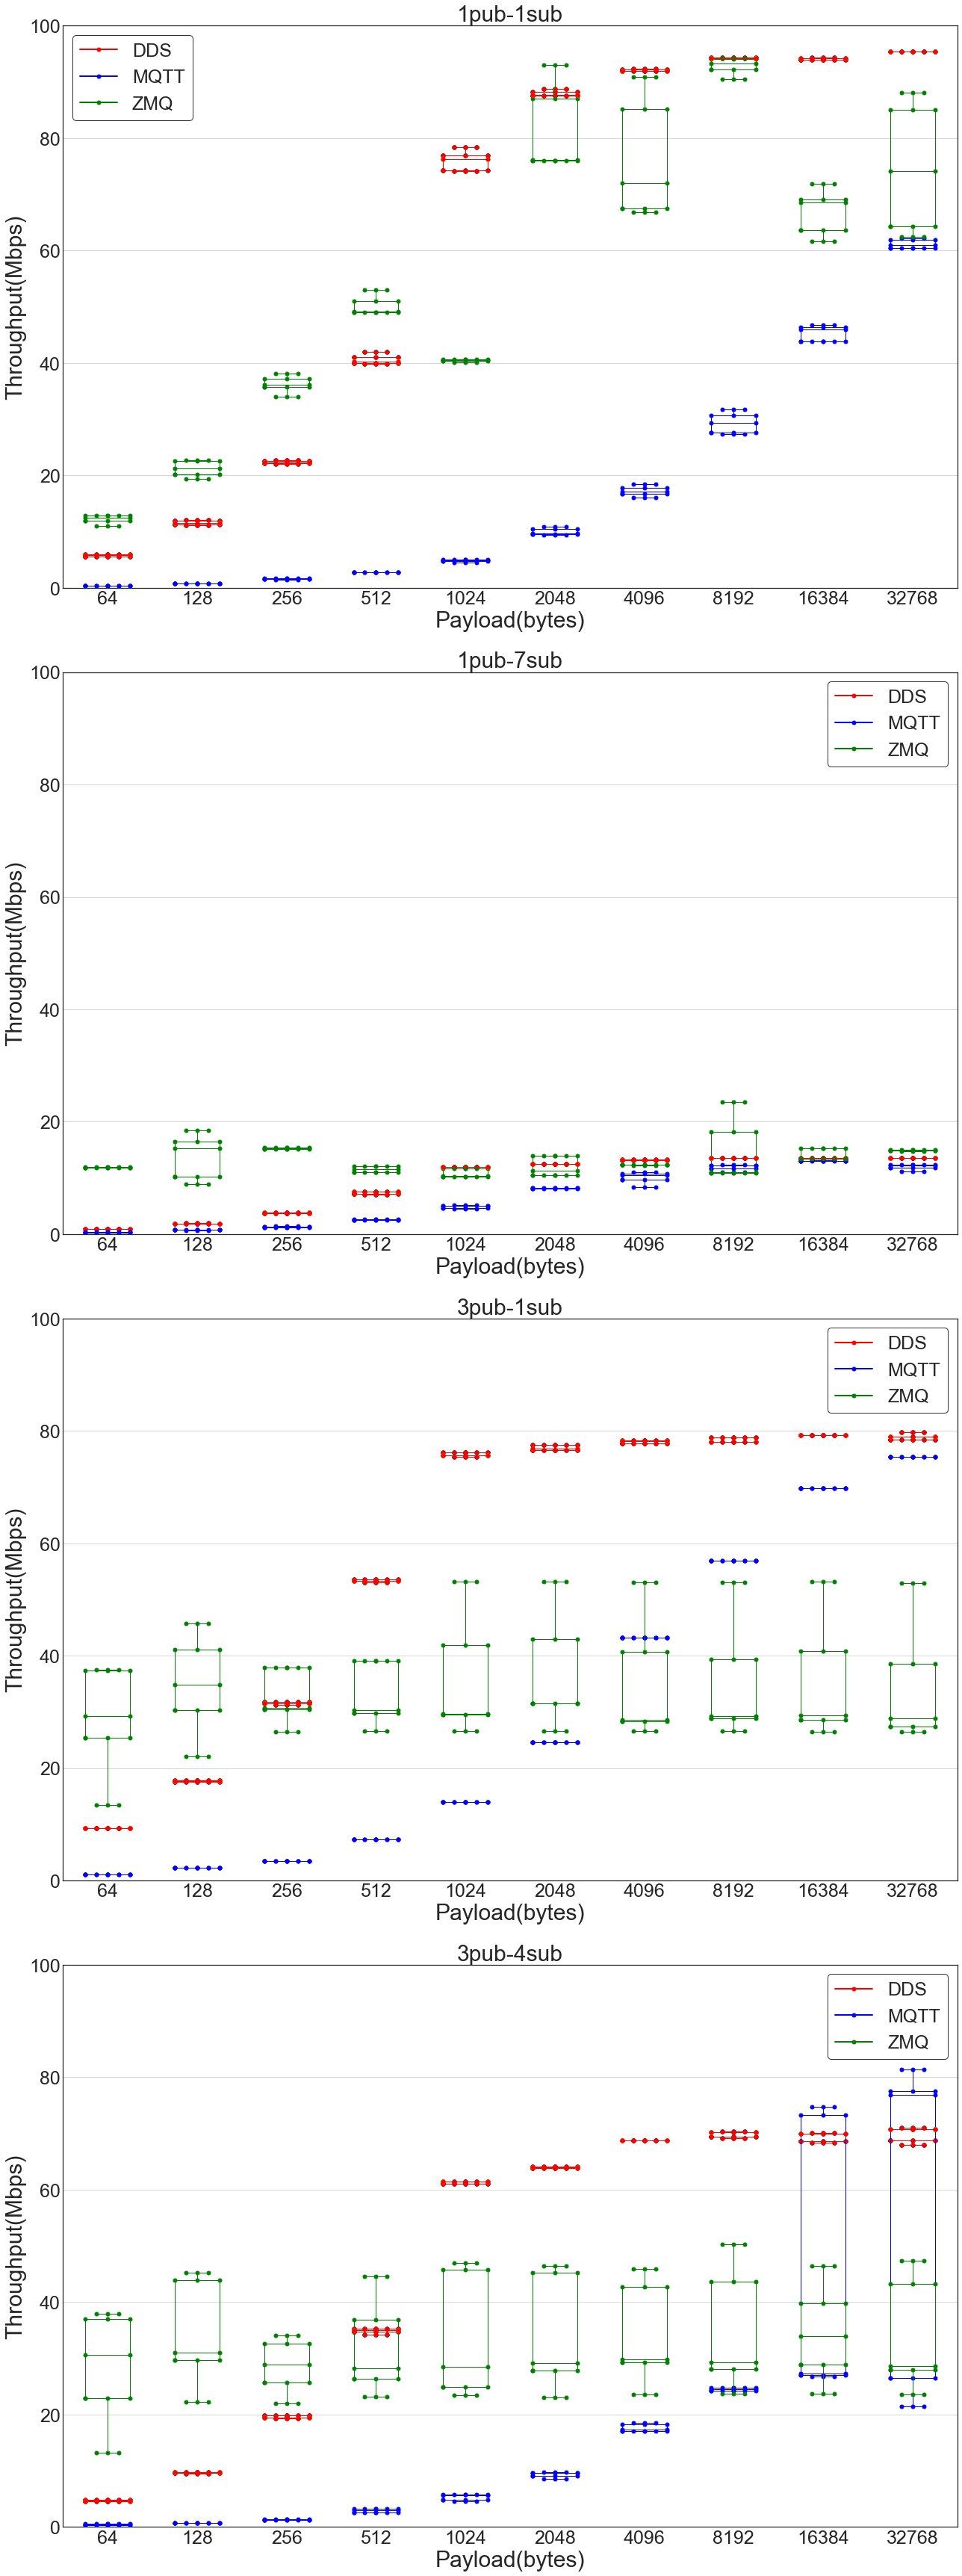

In [16]:
BASE_PATH = './ThroughputTest'
TESTS = ['1-1', '1-n', 'n-1', 'n-n']
MIDDLEWARES = ['DDS', 'ZMQ', 'MQTT']
SUPERTITLE = 'Throughput Tests'
DATA_LEN = [2**i for i in range(6, 16)]

for tag in params:
    plt.rcParams[tag] = params[tag]

fig = plt.figure(figsize=(18, 48))
# plt.suptitle(SUPERTITLE)

dds_data = []
mqtt_data = []
zmq_data = []
  
def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

labels = ['1pub-1sub', '1pub-7sub', '3pub-1sub', '3pub-4sub']

for j, test in enumerate(TESTS):
    ax = plt.subplot(4, 1, j+1)
    ax.set_title(labels[j])
    x = np.arange(len(DATA_LEN))
    for mid in MIDDLEWARES:
        try:
            f_name = '%s/%s/%s.csv' % (BASE_PATH, mid, test)
            if not os.path.exists(f_name): continue
            df =  pd.read_csv(f_name)
            transpose_t = df[['t1', 't2', 't3', 't4', 't5']].transpose()
            for i, data_len in enumerate(DATA_LEN):
                if mid == 'DDS':
                    dds_data.append(transpose_t[i])
                elif mid == 'MQTT':
                    mqtt_data.append(transpose_t[i])
                else:
                    zmq_data.append(transpose_t[i])
            
            if mid == 'DDS':
                print(test, mid, [np.mean(x) for x in dds_data])
            elif mid == 'MQTT':
                print(test, mid, [np.mean(x) for x in mqtt_data])
            else:
                print(test, mid, [np.mean(x) for x in zmq_data])
                
                
            dds_bp = ax.boxplot(dds_data, labels=DATA_LEN, showfliers=False, positions=x)
            mqtt_bp = ax.boxplot(mqtt_data, labels=DATA_LEN, showfliers=False, positions=x)
            zmq_bp = ax.boxplot(zmq_data,labels=DATA_LEN, showfliers=False, positions=x)    
        
            set_box_color(dds_bp, DDS_COLOR)
            set_box_color(mqtt_bp, MQTT_COLOR)
            set_box_color(zmq_bp, ZMQ_COLOR)
    
        except Exception as err:
            print(err)
            
    dds_data = []
    mqtt_data = []
    zmq_data = []
    
    ax.set_ylabel('Throughput(Mbps)')
    ax.set_xlabel('Payload(bytes)')
        
    ax.plot([], c=DDS_COLOR, label='DDS')
    ax.plot([], c=MQTT_COLOR, label='MQTT')
    ax.plot([], c=ZMQ_COLOR, label='ZMQ')
    ax.legend()
    ax.set_ylim(0, 100)
    ax.grid(axis='y')

fig.tight_layout()
plt.subplots_adjust(wspace =.0, hspace =.15)
plt.show()

# Latency Test

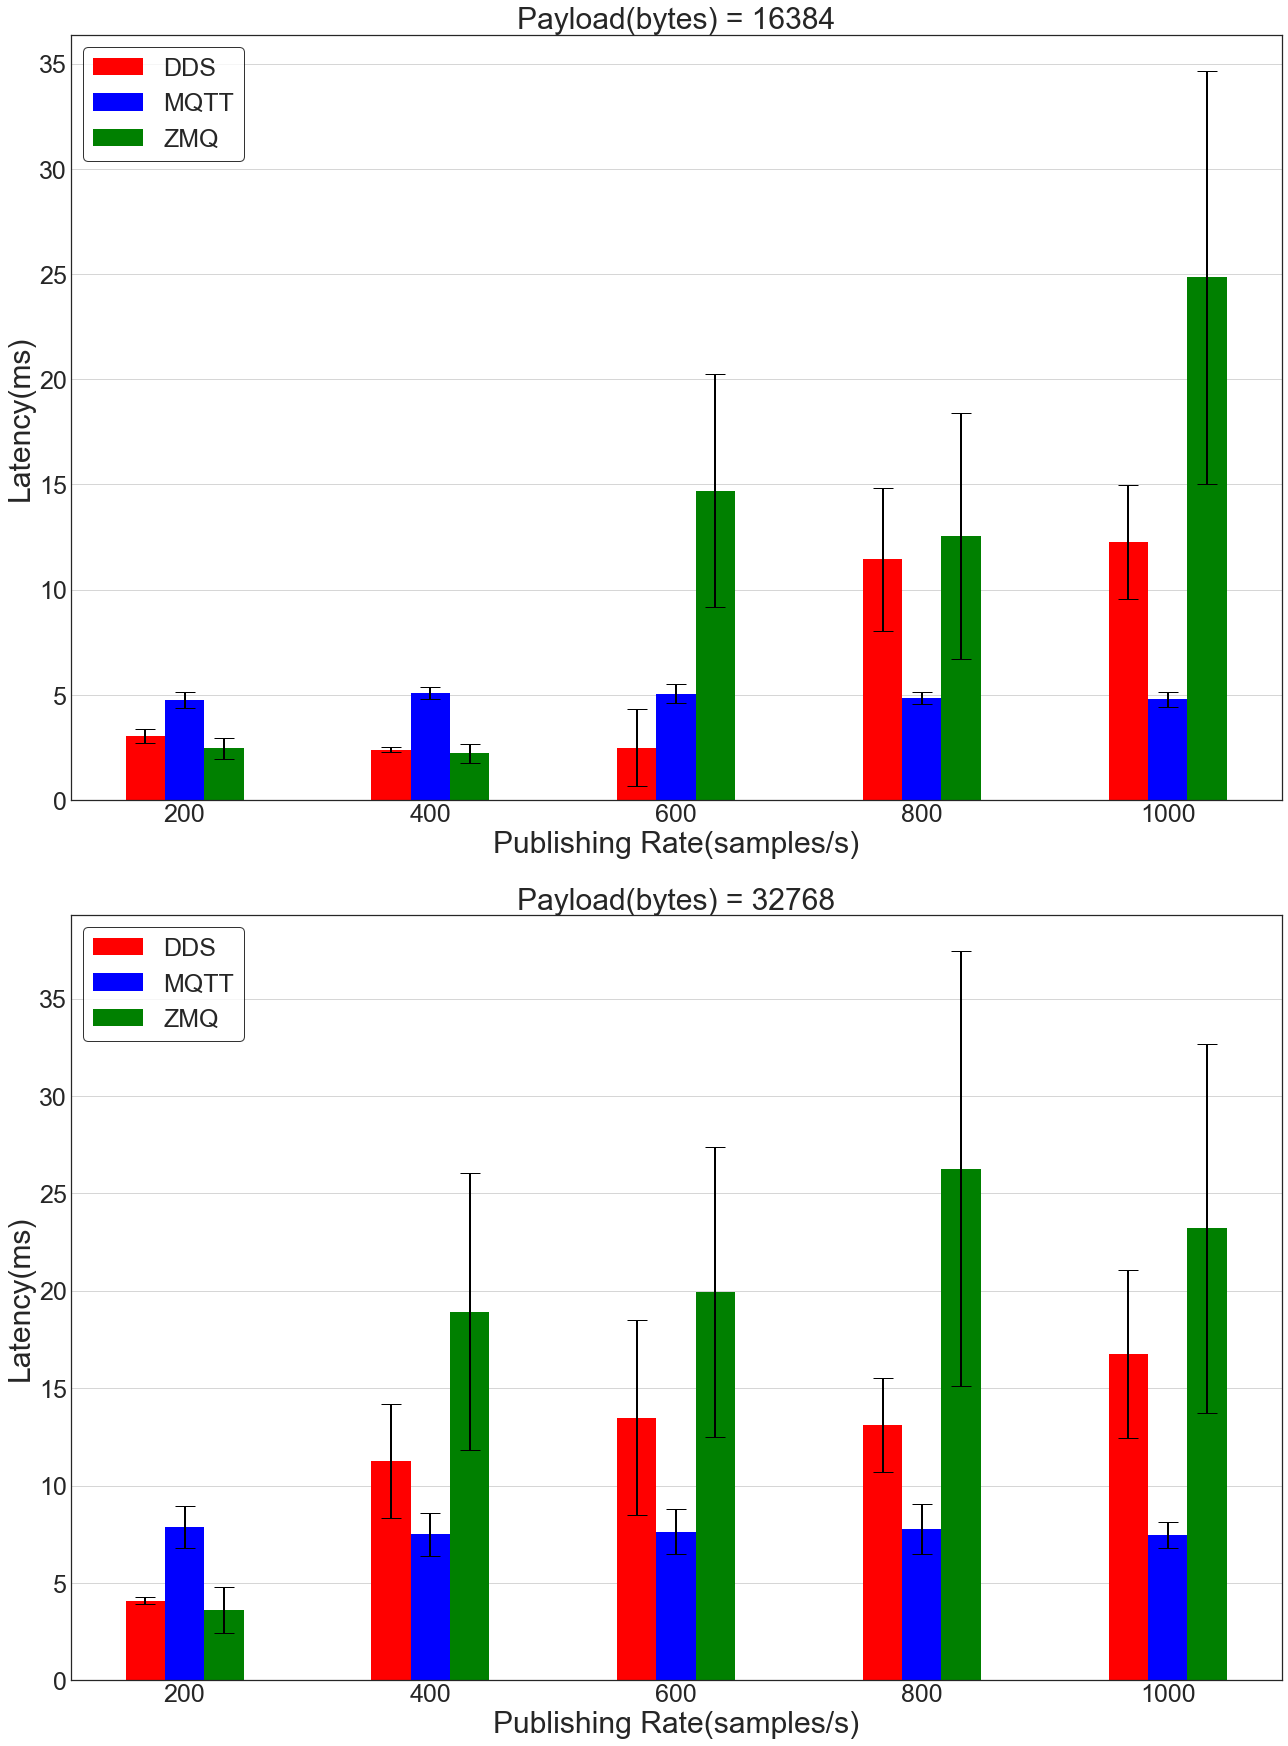

In [18]:
BASE_PATH = './LatencyTest/LatencyTest(90th).csv'
TESTS = ['1-1']
MIDDLEWARES = ['DDS', 'ZMQ', 'MQTT']
SUPERTITLE = 'Latency Tests'
DATA_LEN = [64, 2048, 16384, 32768]
PUB_RATE = [200, 400, 600, 800, 1000]

fig = plt.figure(figsize=(18, 48))
# plt.suptitle(SUPERTITLE)

for tag in params:
    plt.rcParams[tag] = params[tag]
    

df =  pd.read_csv(BASE_PATH)
x = np.arange(len(PUB_RATE))
for i, dl in enumerate(DATA_LEN[2:]):
    ax = plt.subplot(4, 1, i+1)

    total_width, n = 0.8, 5
    width = total_width / n
    x = x - (total_width - width) / 2
    
    ax.set_title('Payload(bytes) = %d' % dl)
    dds = df[df['data_length'] == dl]['DDS Latency']/1000
    mqtt = df[df['data_length'] == dl]['MQTT Latency']/1000
    zmq = df[df['data_length'] == dl]['ZMQ Latency']/1000

    dds_std = df[df['data_length'] == dl]['DDS Latency Std']/1000
    mqtt_std = df[df['data_length'] == dl]['MQTT Latency Std']/1000
    zmq_std = df[df['data_length'] == dl]['ZMQ Latency Std']/1000
    
    ax.bar(x, dds.tolist(), label='DDS', yerr=dds_std.tolist(), align='center', ecolor='black', capsize=10, color=DDS_COLOR, width = width)
    ax.bar(x + width, mqtt, label='MQTT', yerr=mqtt_std, align='center', ecolor='black', capsize=10, color=MQTT_COLOR, width = width)
    ax.bar(x + 2*width, zmq, label='ZMQ', yerr=zmq_std, align='center', ecolor='black', capsize=10, color=ZMQ_COLOR,  width = width)

    ax.set_xticks(x + 0.5 * 2 *width)
    ax.set_xticklabels([str(k) for k in PUB_RATE])
    ax.set_ylabel('Latency(ms)')
    ax.set_xlabel('Publishing Rate(samples/s)')
    ax.legend()
    ax.set_ylim(0)
    ax.grid(axis='y')

fig.tight_layout()
plt.subplots_adjust(wspace =0, hspace =.15)
plt.show()

# DDS QoS Test

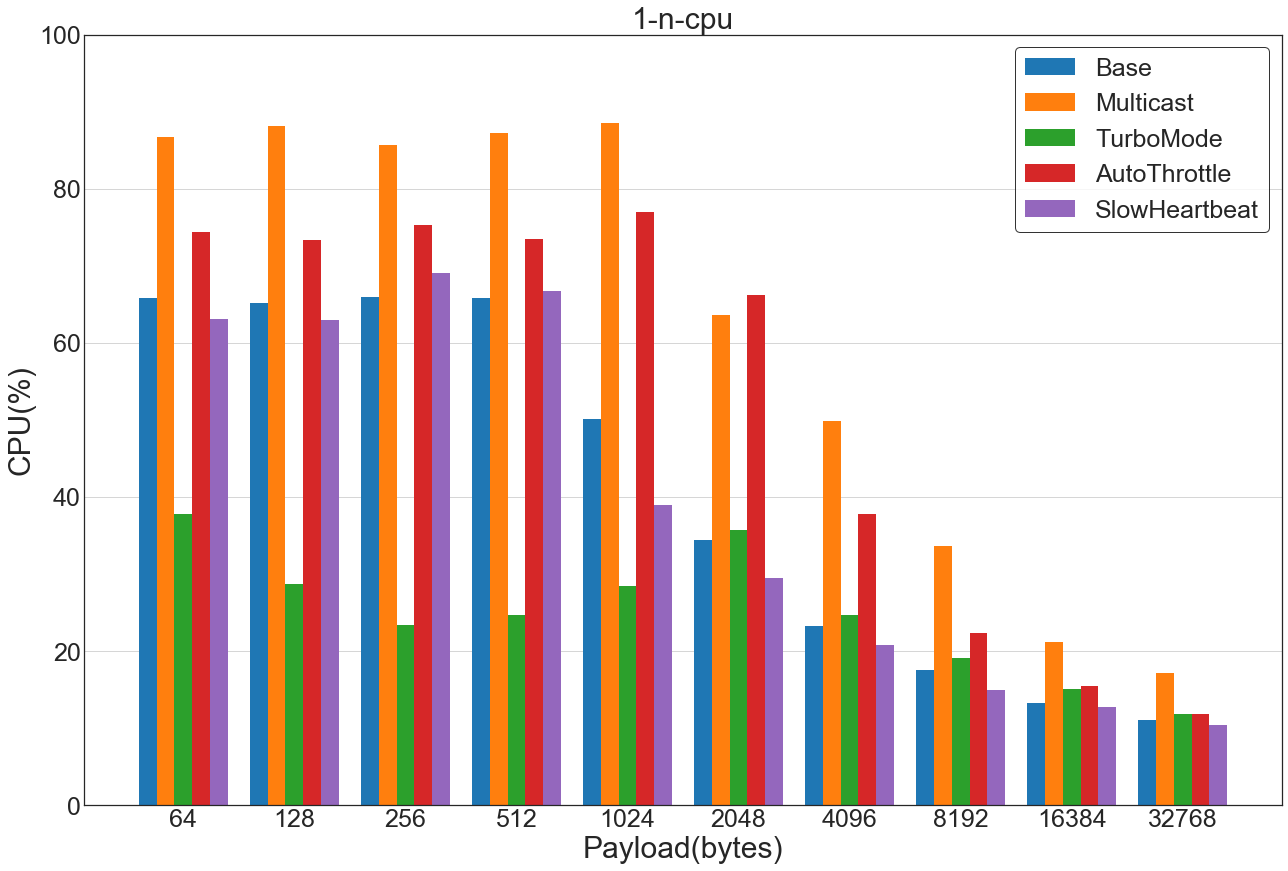

In [28]:
BASE_PATH = './QoSTest/'
TESTS = ['1-1', '1-n']
MEASUREMENTS = ['throughput', 'latency', 'cpu']
QoS = ['Base', 'Multicast', 'TurboMode', 'AutoThrottle', 'SlowHeartbeat']

SUPERTITLE = 'DDS QoS Tests'
DATA_LEN = [2**i for i in range(6, 16)]

fig = plt.figure(figsize=(18, 36))
# plt.title(SUPERTITLE)

for tag in params:
    plt.rcParams[tag] = params[tag]
    
i = 0
x = np.arange(len(DATA_LEN))
for test in TESTS[1:]:
    for measure in MEASUREMENTS[2:]:
        ax = plt.subplot(3, 1, i+1)
        ax.set_title('%s-%s' % (test, measure))
        
        path = '%s/%s/%s.csv' % (BASE_PATH, test, measure)
        df =  pd.read_csv(path)
        
        total_width, n = 0.8, 5
        width = total_width / n
        x = x - (total_width - width) / 2
        
        for j, qos in enumerate(QoS):
            ax.bar(x + j*width, df[qos], width=width, label=qos)
        
        ax.set_xticks(x + 0.5 * 4 *width)
        ax.set_xticklabels([str(k) for k in DATA_LEN])
        if measure == 'throughput':
            ax.set_ylim(0, 100)
            ax.set_ylabel('Throughput(Mbps)')
        elif measure == 'latency':
            ax.set_ylabel('Latency(ms)')
        else:
            ax.set_ylim(0, 100)
            ax.set_ylabel('CPU(%)')
        ax.set_xlabel('Payload(bytes)')
        ax.legend()
        ax.grid(axis='y')
        i += 1

fig.tight_layout()
plt.subplots_adjust(wspace =.0, hspace =.15)
plt.show()

# Sporadic Data-Flow Test

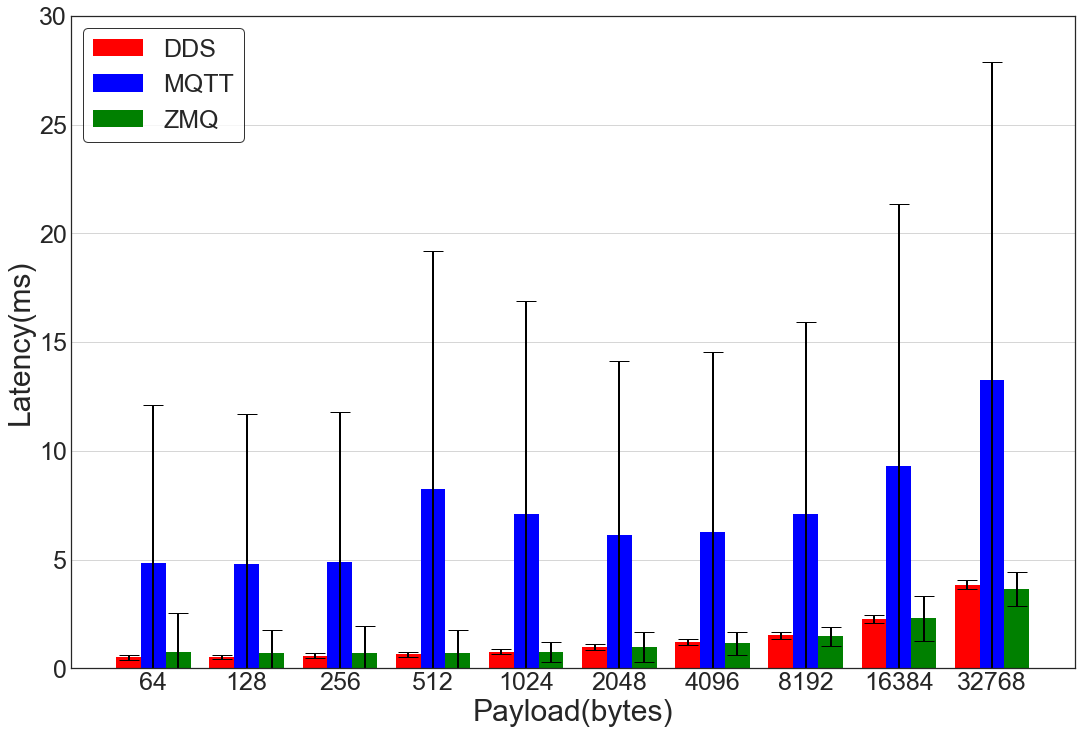

In [82]:
BASE_PATH = './SporadicTest'
MIDDLEWARE = ['DDS', 'MQTT', 'ZMQ']
DATA_LEN = [2**i for i in range(6, 16)]

SUPERTITLE = 'Sporadic Data-flow Test'
fig = plt.figure(figsize=(18, 12))
# plt.suptitle(SUPERTITLE)

colors = [DDS_COLOR, MQTT_COLOR, ZMQ_COLOR]

for tag in params:
    plt.rcParams[tag] = params[tag]
    
# plt.title('Latency vs. DataLen (Sporadic Data-flow Scenario)')
plt.ylabel('Latency(ms)')
plt.xlabel('Payload(bytes)')

for i, mid in enumerate(MIDDLEWARE):
    path = '%s/%s-Sporadic-Latency.csv' % (BASE_PATH, mid)
    df = pd.read_csv(path)
    
    data = df['latency(ave)']/1000
    std = df['latency(std)']/1000
    
    x = np.arange(len(DATA_LEN))
    total_width, n = 0.8, 3
    width = total_width / n
    x = x - (total_width - width) / 2
    
    plt.bar(x + i*width, data, yerr=std, width=width, label=mid, align='center', ecolor='black', capsize=10, color=colors[i])
    plt.xticks(x + 0.5 * 2 *width, [str(k) for k in DATA_LEN])

plt.ylim(0, 30)
plt.grid(axis='y')
plt.legend()
plt.show()

# Background Interference Test

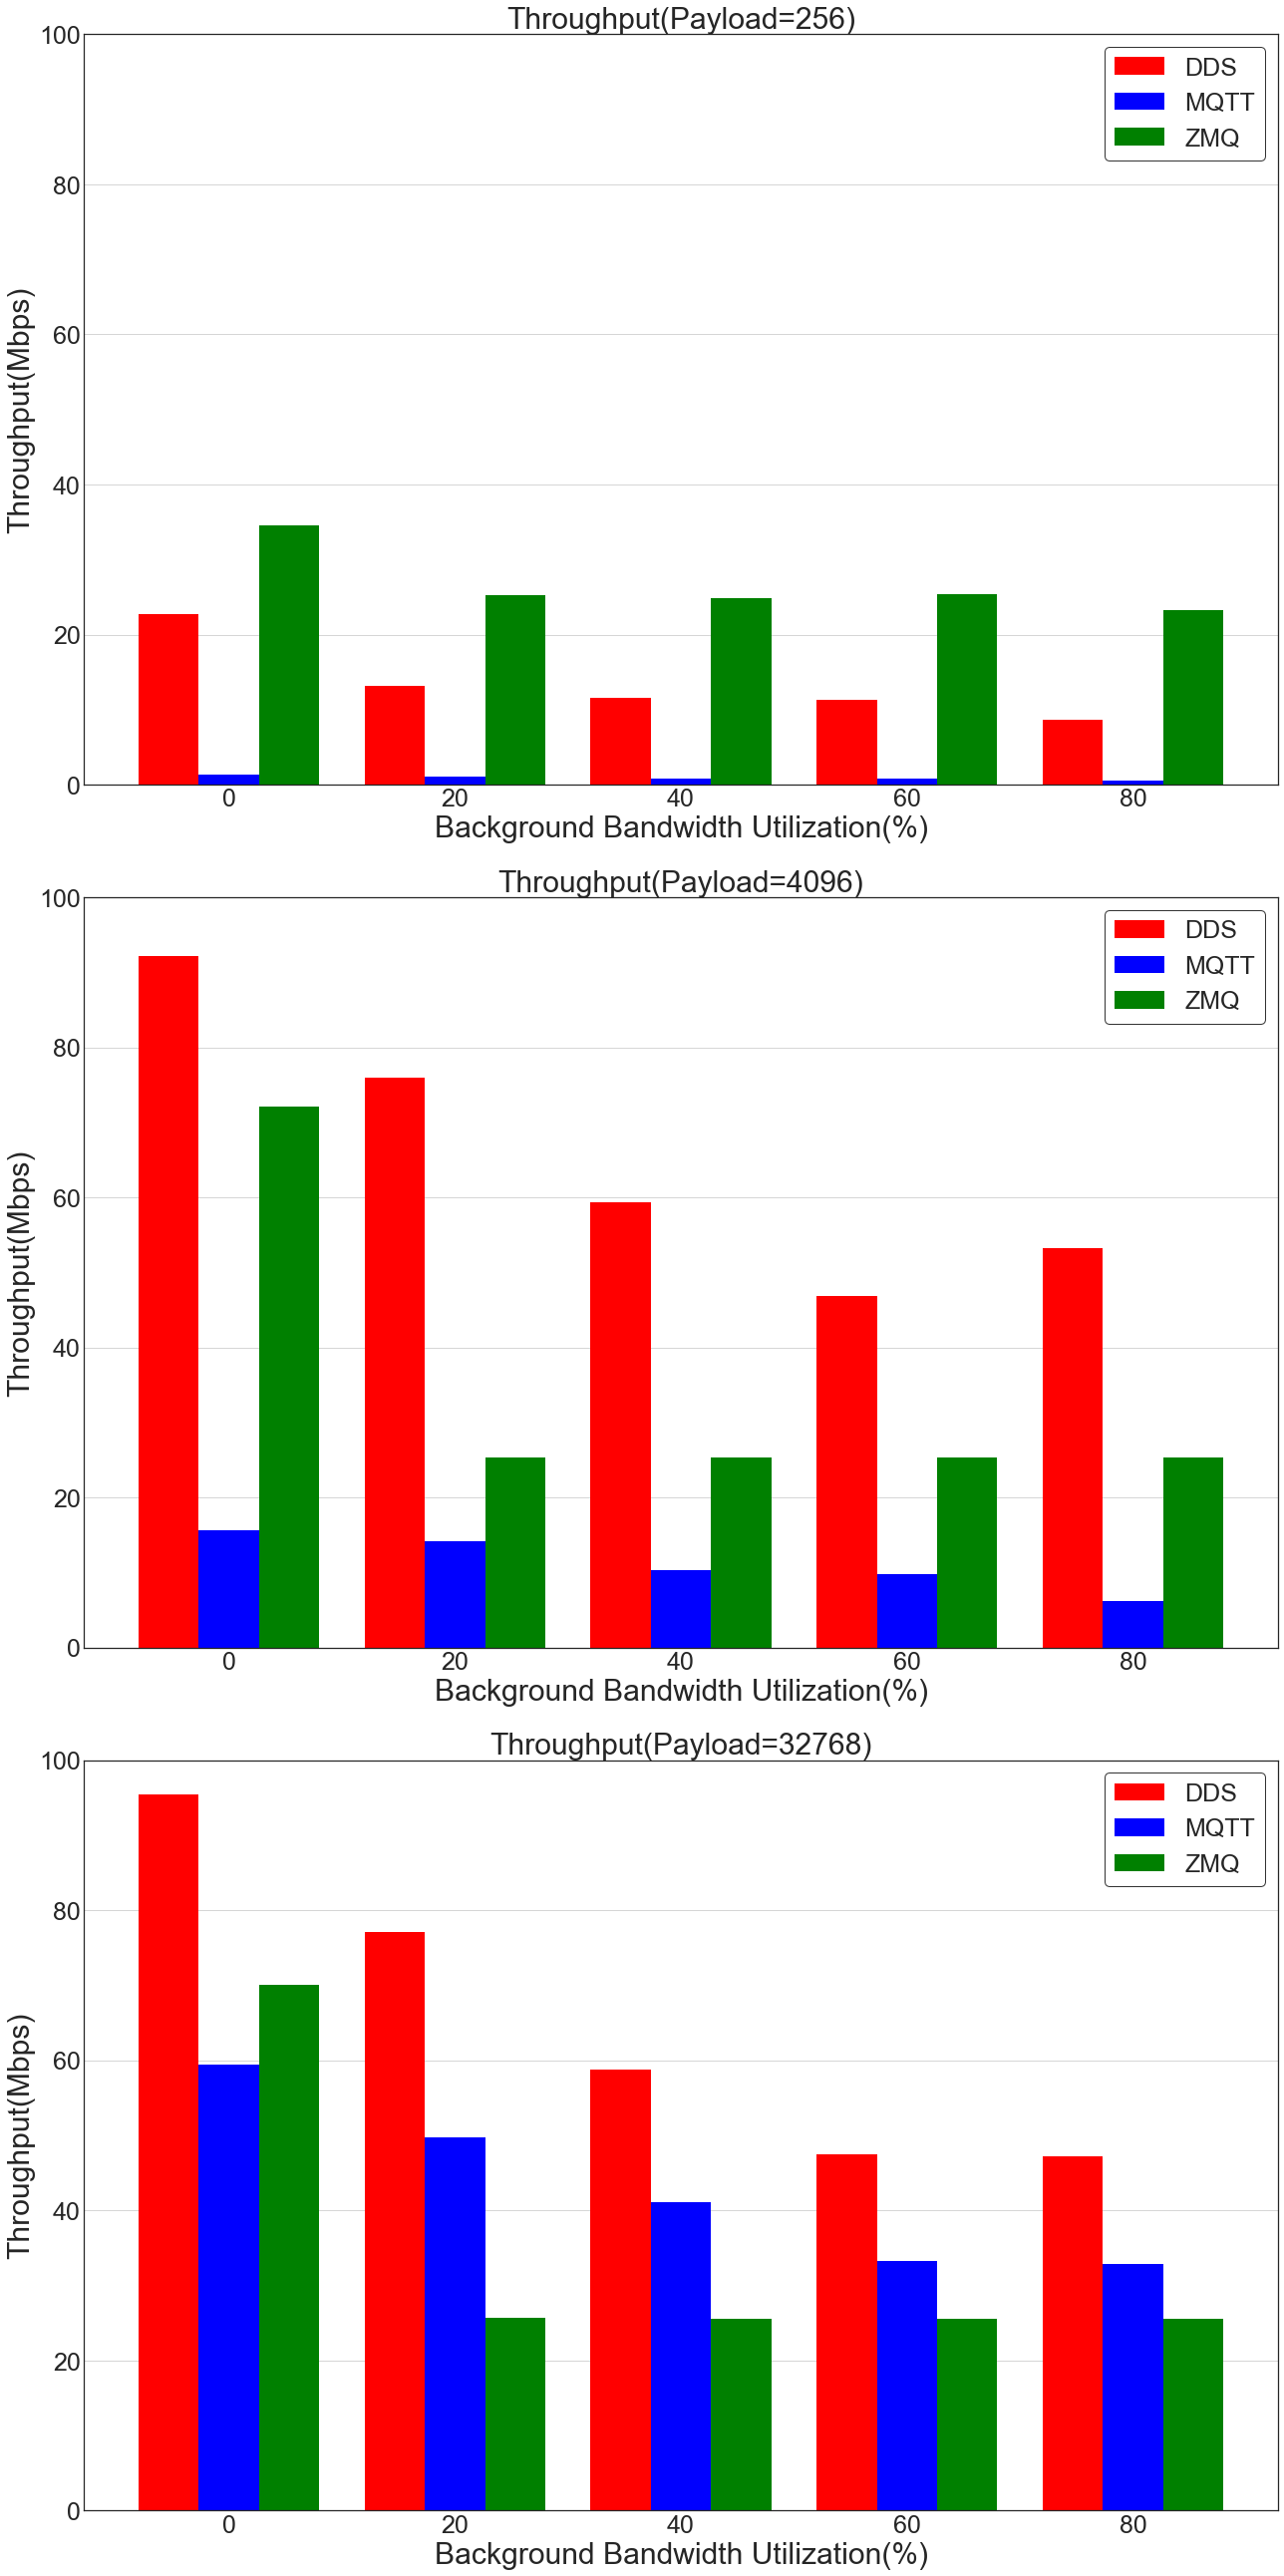

In [84]:
BASE_PATH = './NetworkTest'
MIDDLEWARE = ['DDS', 'MQTT', 'ZMQ']
DATALEN = [256, 4096, 32768]
TRAFFIC = [0, 20, 40 , 60, 80]
SUPERTITLE = 'Background Traffic Interference Test'

fig = plt.figure(figsize=(18, 36))
# plt.suptitle(SUPERTITLE)

for tag in params:
    plt.rcParams[tag] = params[tag]

plt.rcParams['legend.loc'] = 'upper right'
i = 0
x = np.arange(len(TRAFFIC))
for j, data_len in enumerate(DATALEN):
    ax = plt.subplot(3, 1, i+1)
    for middleware in MIDDLEWARE: 
        path = '%s/%s-Throughput.csv' % (BASE_PATH, middleware)
        df = pd.read_csv(path)
        if middleware == 'DDS':
            dds_data = df[df['data_len'] == data_len].values.tolist()[0][1:][:-1]
        elif middleware == 'MQTT':
            mqtt_data = df[df['data_len'] == data_len].values.tolist()[0][1:][:-1]
        else:
            zmq_data = df[df['data_len'] == data_len].values.tolist()[0][1:][:-1]
    
    total_width, n = 0.8, 3
    width = total_width / n
    x = x - (total_width - width) / 2
    
    ax.set_xticks(x + 0.5 * 2 *width)
    ax.set_xticklabels([str(k) for k in TRAFFIC])
    
    ax.set_title('Throughput(Payload=%d)' % data_len)
    ax.set_ylabel('Throughput(Mbps)')
    ax.set_xlabel('Background Bandwidth Utilization(%)')
    ax.bar(x, dds_data, width=width, label='DDS', color=DDS_COLOR)
    ax.bar(x + width, mqtt_data, width=width, label='MQTT', color=MQTT_COLOR)
    ax.bar(x + 2*width, zmq_data, width=width, label='ZMQ', color=ZMQ_COLOR)
    ax.set_ylim(0, 100)
    ax.grid(axis='y')
    ax.legend()
    i+=1

fig.tight_layout()
plt.subplots_adjust(wspace =.0, hspace =.15)
plt.show()

# Serialization Test

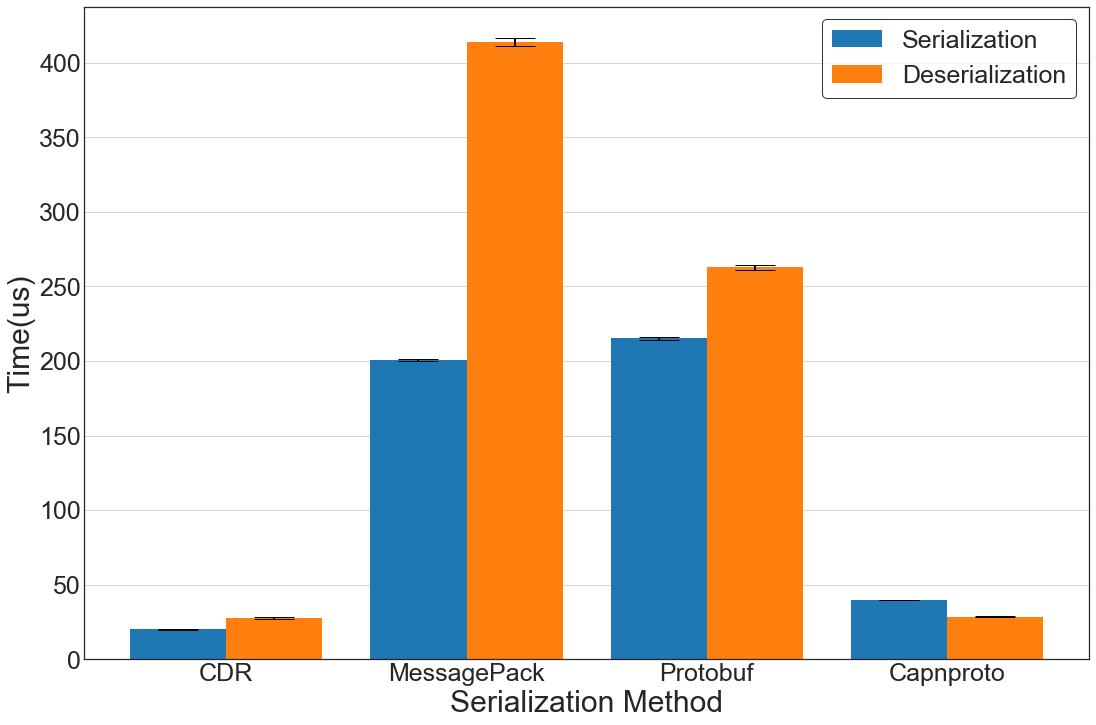

In [30]:
BASE_PATH = './SerializationTest/serialization.csv'
TESTS = ['DDS', 'MessagePack', 'Protobuf', 'Capnproto']
MEASUREMENTS = ['Serialization', 'Deserialization']

fig = plt.figure(figsize=(18, 12))
# plt.title(SUPERTITLE)

for tag in params:
    plt.rcParams[tag] = params[tag]
    
df = pd.read_csv(BASE_PATH)
s_mean = []
s_std = []
de_mean = []
de_std = []
for test in TESTS:
    s_mean.append(np.mean(df['%s Serialization' % test]))
    s_std.append(np.std(df['%s Serialization' % test]))
    de_mean.append(np.mean(df['%s Deserialization' % test]))
    de_std.append(np.std(df['%s Deserialization' % test]))

x = np.arange(len(TESTS))

        
total_width, n = 0.8, 2
width = total_width / n
x = x - (total_width - width) / 2

plt.bar(x, s_mean, yerr=s_std, width=width, capsize=20, label='Serialization')
plt.bar(x + width, de_mean, yerr=de_std, width=width,capsize=20, label='Deserialization')

plt.ylabel('Time(us)')
plt.xlabel('Serialization Method')
TESTS = ['CDR', 'MessagePack', 'Protobuf', 'Capnproto']
plt.xticks(x + 0.5  *width, TESTS)
plt.legend()
plt.grid(axis='y')
plt.show()

# Raspberry Pi vs. Beaglebone  Blacks 

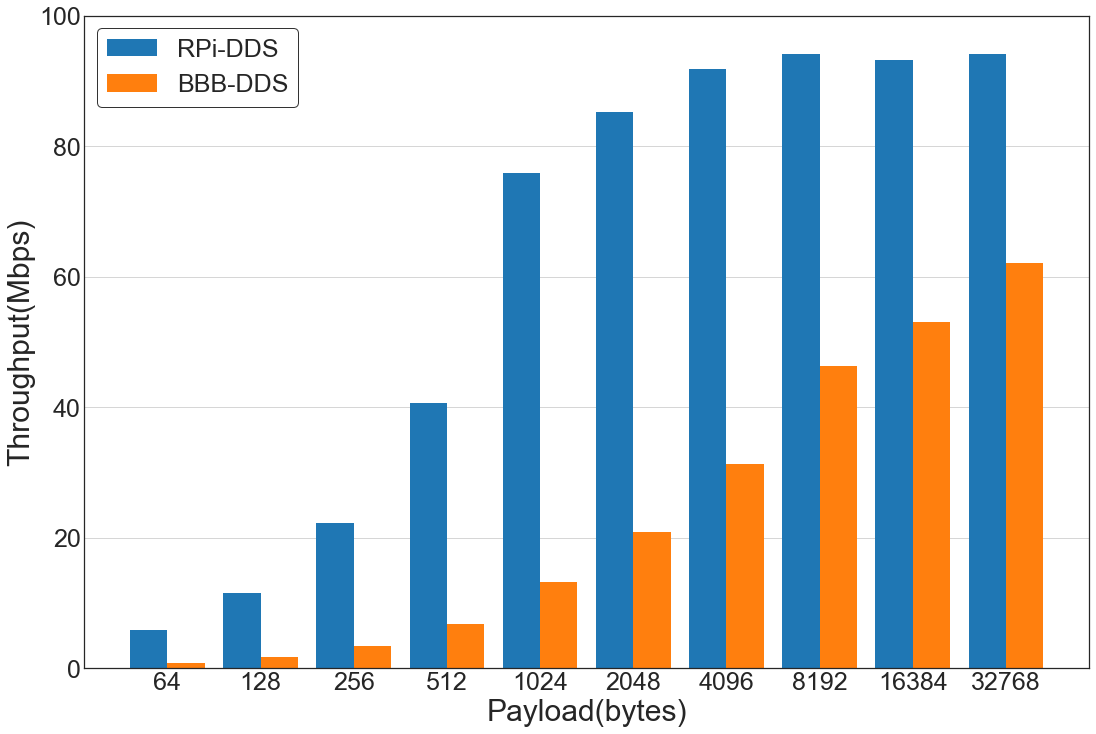

In [36]:
BASE_PATH = './RPi&BBB/Raspberry-BBB.csv'
DATA_LEN = [2**i for i in range(6, 16)]

fig = plt.figure(figsize=(18, 12))
# plt.title(SUPERTITLE)

for tag in params:
    plt.rcParams[tag] = params[tag]
    
df = pd.read_csv(BASE_PATH)
x = np.arange(len(DATA_LEN))

total_width, n = 0.8, 2
width = total_width / n
x = x - (total_width - width) / 2

plt.bar(x, df['RPi-DDS(Mbps)'].tolist(), width=width, label='RPi-DDS')
plt.bar(x + width, df['BBB-DDS(Mbps)'].tolist(), width=width, label='BBB-DDS')
plt.ylim(0, 100)


plt.ylabel('Throughput(Mbps)')
plt.xlabel('Payload(bytes)')
plt.xticks(x + 0.5*1*width, DATA_LEN)
plt.legend()
plt.grid(axis='y')
plt.show()

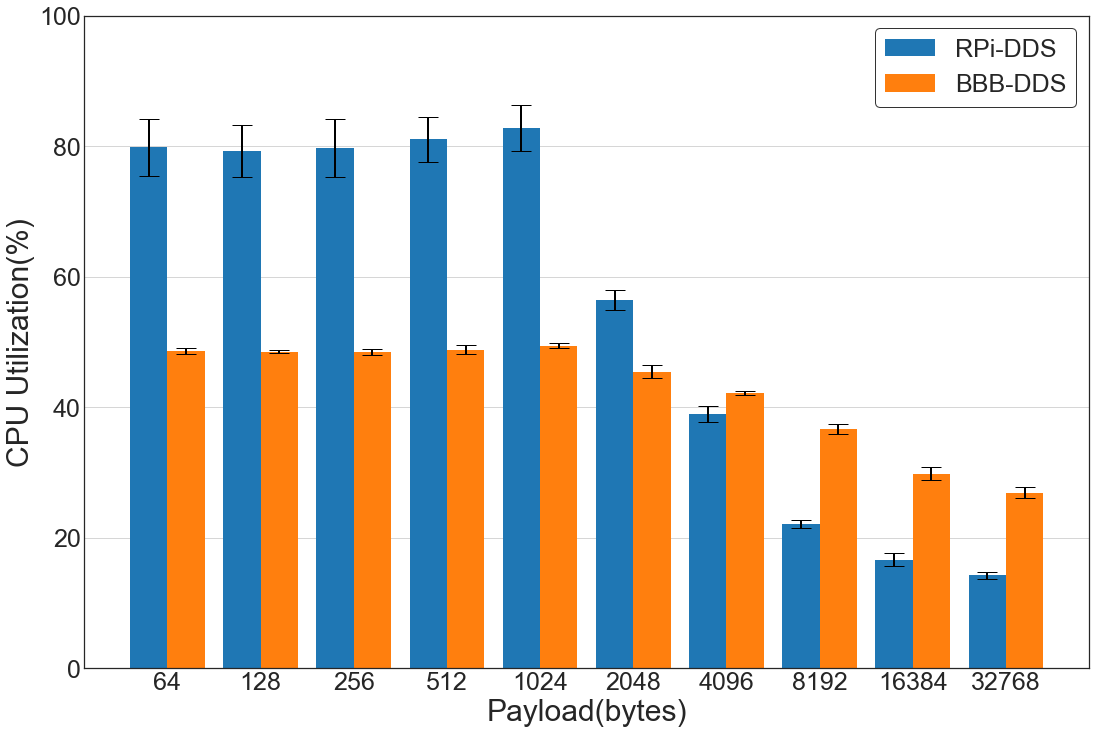

In [41]:
fig = plt.figure(figsize=(18, 12))
total_width, n = 0.8, 2
x = np.arange(len(DATA_LEN))
width = total_width / n
x = x - (total_width - width) / 2

plt.bar(x, df['RPI-CPU-DDS(avg)'].tolist(), yerr=df['RPI-CPU-DDS(std)'], width=width, capsize=10, label='RPi-DDS')
plt.bar(x + width, df['BBB-CPU-DDS(avg)'].tolist(), yerr=df['BBB-CPU-DDS(std)'], width=width,capsize=10,  label='BBB-DDS')

plt.ylim(0, 100)
plt.ylabel('CPU Utilization(%)')
plt.xlabel('Payload(bytes)')
plt.xticks(x + 0.5*1*width, DATA_LEN)
plt.legend()
plt.grid(axis='y')
plt.show()

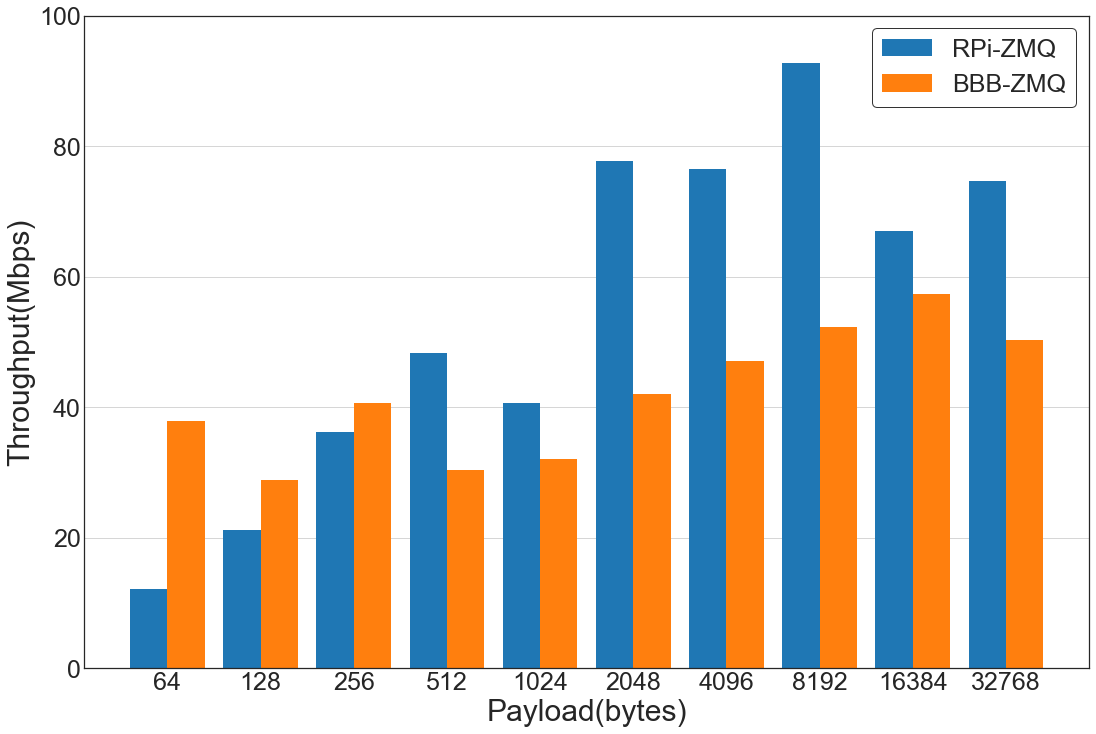

In [46]:
for tag in params:
    plt.rcParams[tag] = params[tag]

fig = plt.figure(figsize=(18, 12))

x = np.arange(len(DATA_LEN))
total_width, n = 0.8, 2
width = total_width / n
x = x - (total_width - width) / 2

plt.bar(x, df['RPi-ZMQ(Mbps)'].tolist(), width=width, label='RPi-ZMQ')
plt.bar(x + width, df['BBB-ZMQ(Mbps)'].tolist(), width=width, label='BBB-ZMQ')


plt.ylim(0, 100)
plt.ylabel('Throughput(Mbps)')
plt.xlabel('Payload(bytes)')
plt.xticks(x + 0.5*1*width, DATA_LEN)
plt.legend()
plt.grid(axis='y')
plt.show()